In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
housing = pd.read_csv("Housing_Dataset.csv")

In [46]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [48]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [49]:
housing.shape

(545, 13)

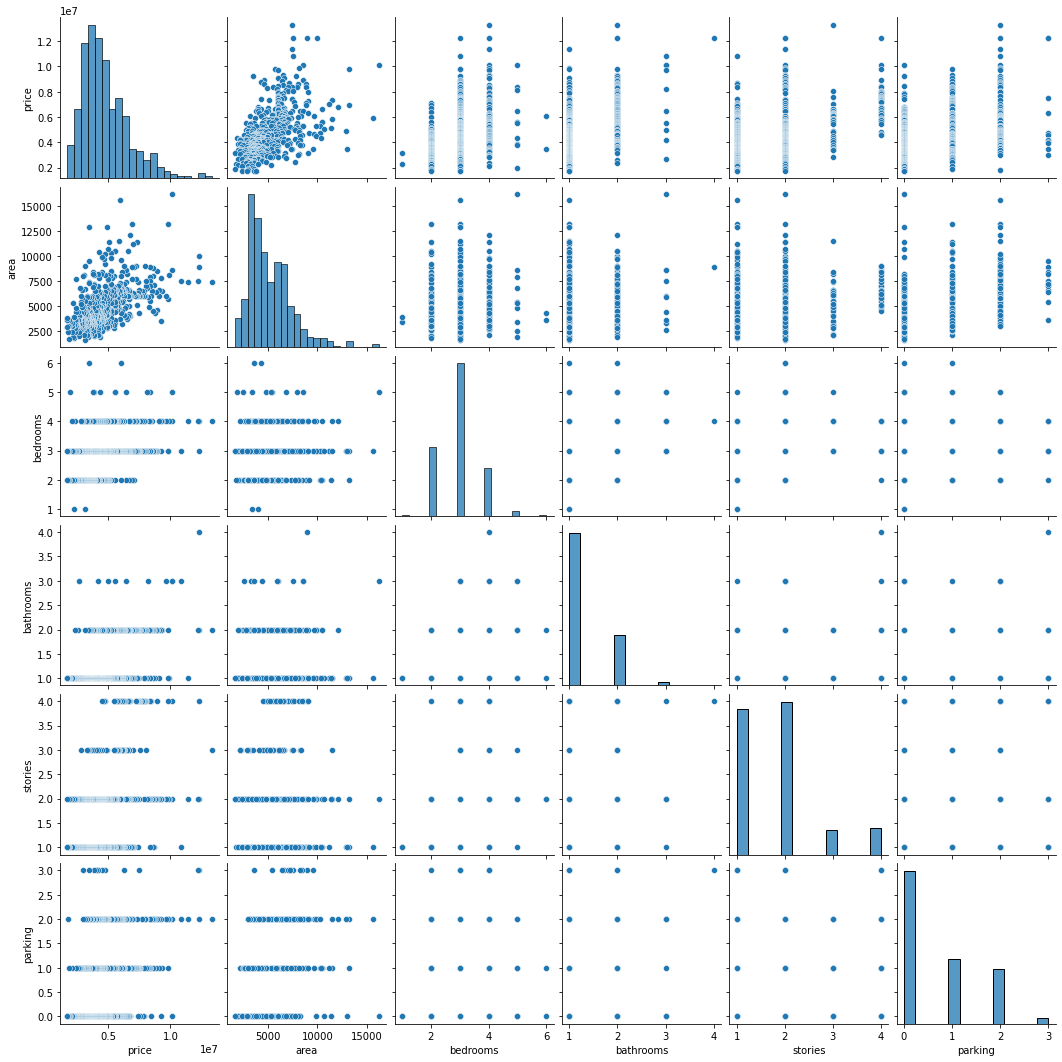

In [50]:
sns.pairplot(housing)
plt.show()

<AxesSubplot:xlabel='furnishingstatus', ylabel='area'>

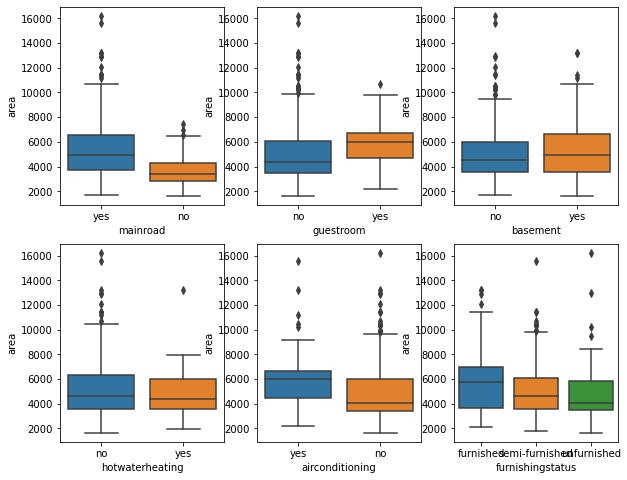

In [51]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='area', data=housing)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='area', data=housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement', y='area', data=housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='area', data=housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='area', data=housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y='area', data=housing)



In [52]:
varlist = ['mainroad','guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']

In [53]:
housing[varlist]= housing[varlist].apply(lambda x : x.map({'yes':1 , 'no':0}))

In [54]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [55]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [56]:
housing = pd.concat([housing,status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [57]:
housing = housing.drop('furnishingstatus', axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [58]:
df_train, df_test = train_test_split(housing, train_size=0.7)

In [59]:
df_train.shape

(381, 14)

In [60]:
df_test.shape

(164, 14)

## Model Development

In [61]:
scaler = MinMaxScaler()

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
294,0.212121,0.161512,0.6,0.5,0.333333,0,0,0,0,0,0.000000,0,1,0
131,0.351515,0.287148,0.6,0.0,1.000000,1,1,0,0,0,0.000000,0,1,0
51,0.490909,0.321306,0.4,0.0,1.000000,1,0,0,0,1,0.333333,0,0,1
225,0.260000,0.329210,0.2,0.0,0.000000,1,0,0,0,1,1.000000,0,1,0
122,0.363636,0.316426,0.6,0.5,0.000000,1,0,1,0,0,0.333333,1,1,0


In [63]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.262697,0.244419,0.386352,0.143045,0.267717,0.845144,0.173228,0.335958,0.044619,0.328084,0.227472,0.233596,0.427822,0.314961
std,0.170839,0.156141,0.148049,0.248438,0.299237,0.362243,0.378942,0.472945,0.206738,0.470133,0.289470,0.423674,0.495413,0.465111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.218182,0.195876,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.350909,0.327835,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


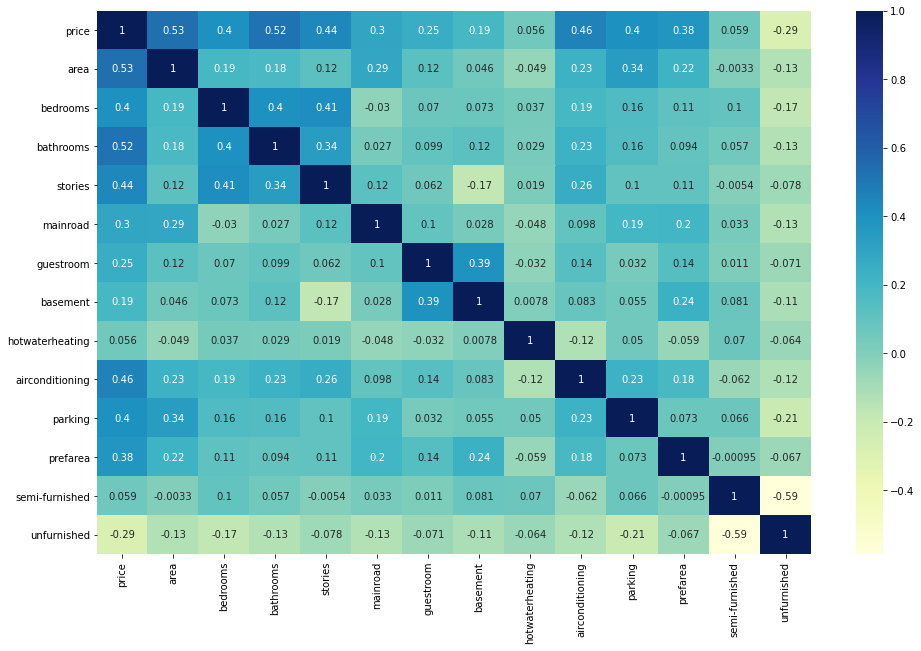

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [65]:
y_train = df_train.pop("price")
X_train = df_train

In [66]:
X_train_sm = sm.add_constant(X_train['area'])

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const    0.120619
area     0.581287
dtype: float64

In [67]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     149.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           3.89e-29
Time:                        23:28:51   Log-Likelihood:                 196.30
No. Observations:                 381   AIC:                            -388.6
Df Residuals:                     379   BIC:                            -380.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1206      0.014      8.738      0.000       0.093       0.148
area           0.5813      0.048     12.208      0.000       0.488       0.675
==============================================================================
Omnibus:                       65.594   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.992
Skew:                           0.970   Prob(JB):                     1.45e-26
Kurtosis:                       4.932   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_sm = X_train[['area','bathrooms']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const        0.097986
area         0.495987
bathrooms    0.303975
dtype: float64

In [69]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           4.39e-53
Time:                        23:28:51   Log-Likelihood:                 254.64
No. Observations:                 381   AIC:                            -503.3
Df Residuals:                     378   BIC:                            -491.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0980      0.012      8.153      0.000       0.074       0.122
area           0.4960      0.042     11.934      0.000       0.414       0.578
bathrooms      0.3040      0.026     11.638      0.000       0.253       0.355
==============================================================================
Omnibus:                       59.660   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.785
Skew:                           0.842   Prob(JB):                     3.59e-27
Kurtosis:                       5.199   Cond. No.                         7.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_train_sm = X_train[['area','bathrooms','bedrooms']]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           2.14e-55
Time:                        23:28:58   Log-Likelihood:                 262.76
No. Observations:                 381   AIC:                            -517.5
Df Residuals:                     377   BIC:                            -501.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0365      0.019      1.903      0.058      -0.001       0.074
area           0.4738      0.041     11.526      0.000       0.393       0.555
bathrooms      0.2610      0.028      9.415      0.000       0.206       0.315
bedrooms       0.1890      0.047      4.052      0.000       0.097       0.281
==============================================================================
Omnibus:                       50.071   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.589
Skew:                           0.758   Prob(JB):                     1.29e-20
Kurtosis:                       4.863   Cond. No.                         9.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding all variables to model

In [71]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [72]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     63.92
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.64e-86
Time:                        23:29:05   Log-Likelihood:                 358.50
No. Observations:                 381   AIC:                            -689.0
Df Residuals:                     367   BIC:                            -633.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0221      0.022      0.992      0.322      -0.022       0.066
area                0.3006      0.036      8.315      0.000       0.230       0.372
bedrooms            0.0634      0.040      1.598      0.111      -0.015       0.141
bathrooms           0.1873      0.023      8.226      0.000       0.143       0.232
stories             0.1094      0.020      5.492      0.000       0.070       0.149
mainroad            0.0411      0.015      2.771      0.006       0.012       0.070
guestroom           0.0364      0.014      2.517      0.012       0.008       0.065
basement            0.0241      0.012      1.964      0.050   -2.91e-05       0.048
hotwaterheating     0.0698      0.024      2.869      0.004       0.022       0.118
airconditioning     0.0674      0.012      5.760      0.000       0.044       0.090
parking             0.0758      0.019      4.013      0.000       0.039       0.113
prefarea            0.0700      0.013      5.549      0.000       0.045       0.095
semi-furnished     -0.0159      0.013     -1.269      0.205      -0.041       0.009
unfurnished        -0.0461      0.014     -3.358      0.001      -0.073      -0.019
==============================================================================
Omnibus:                       67.560   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.519
Skew:                           0.912   Prob(JB):                     3.41e-33
Kurtosis:                       5.468   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [73]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending=False)
vif

,features,VIF
1,bedrooms,7.30
4,mainroad,5.44
0,area,4.43
3,stories,2.62
11,semi-furnished,2.36
6,basement,2.05
9,parking,1.99
8,airconditioning,1.83
12,unfurnished,1.82
2,bathrooms,1.72


In [74]:
X = X_train.drop('semi-furnished', axis=1)

In [75]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     69.00
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.99e-86
Time:                        23:29:26   Log-Likelihood:                 357.66
No. Observations:                 381   AIC:                            -689.3
Df Residuals:                     368   BIC:                            -638.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0112      0.021      0.544      0.587      -0.029       0.052
area                0.3030      0.036      8.384      0.000       0.232       0.374
bedrooms            0.0615      0.040      1.549      0.122      -0.017       0.140
bathrooms           0.1869      0.023      8.204      0.000       0.142       0.232
stories             0.1100      0.020      5.521      0.000       0.071       0.149
mainroad            0.0413      0.015      2.783      0.006       0.012       0.070
guestroom           0.0369      0.014      2.545      0.011       0.008       0.065
basement            0.0236      0.012      1.922      0.055      -0.001       0.048
hotwaterheating     0.0694      0.024      2.849      0.005       0.021       0.117
airconditioning     0.0694      0.012      5.984      0.000       0.047       0.092
parking             0.0764      0.019      4.040      0.000       0.039       0.114
prefarea            0.0702      0.013      5.563      0.000       0.045       0.095
unfurnished        -0.0359      0.011     -3.226      0.001      -0.058      -0.014
==============================================================================
Omnibus:                       70.186   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.789
Skew:                           0.934   Prob(JB):                     2.01e-35
Kurtosis:                       5.564   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending=False)
vif

,features,VIF
1,bedrooms,6.39
4,mainroad,5.09
0,area,4.43
3,stories,2.61
6,basement,2.03
9,parking,1.99
8,airconditioning,1.81
2,bathrooms,1.72
10,prefarea,1.51
5,guestroom,1.49


In [77]:
X = X.drop('bedrooms', axis=1)

In [78]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     74.77
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.31e-87
Time:                        23:30:04   Log-Likelihood:                 356.43
No. Observations:                 381   AIC:                            -688.9
Df Residuals:                     369   BIC:                            -641.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.016      2.041      0.042       0.001       0.063
area                0.3096      0.036      8.610      0.000       0.239       0.380
bathrooms           0.1957      0.022      8.854      0.000       0.152       0.239
stories             0.1201      0.019      6.363      0.000       0.083       0.157
mainroad            0.0378      0.015      2.574      0.010       0.009       0.067
guestroom           0.0363      0.015      2.504      0.013       0.008       0.065
basement            0.0253      0.012      2.067      0.039       0.001       0.049
hotwaterheating     0.0701      0.024      2.871      0.004       0.022       0.118
airconditioning     0.0696      0.012      5.991      0.000       0.047       0.092
parking             0.0778      0.019      4.113      0.000       0.041       0.115
prefarea            0.0707      0.013      5.597      0.000       0.046       0.096
unfurnished        -0.0378      0.011     -3.415      0.001      -0.060      -0.016
==============================================================================
Omnibus:                       73.861   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.111
Skew:                           0.967   Prob(JB):                     1.56e-38
Kurtosis:                       5.688   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ='VIF', ascending=False)
vif

,features,VIF
3,mainroad,4.42
0,area,4.11
2,stories,2.26
8,parking,1.98
5,basement,1.91
7,airconditioning,1.80
1,bathrooms,1.64
9,prefarea,1.51
4,guestroom,1.49
10,unfurnished,1.33


### Residual Analysis 

In [80]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

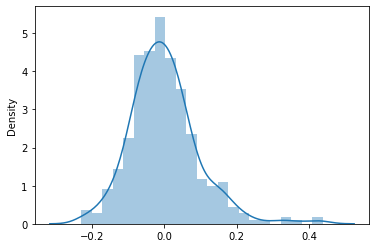

In [85]:
res = y_train - y_train_pred
sns.distplot(res)

In [86]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [87]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.257685,0.231685,0.408537,0.143293,0.270325,0.890244,0.189024,0.384146,0.048780,0.286585,0.239837,0.237805,0.390244,0.353659
std,0.139524,0.131503,0.145864,0.258388,0.265155,0.313543,0.392727,0.487882,0.216069,0.453551,0.282526,0.427043,0.489299,0.479569
min,0.018182,0.017526,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.128385,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.236061,0.214605,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.307732,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,0.608247,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
y_test = df_test.pop('price')

In [92]:
X_test= df_test

In [98]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
117,1.0,0.140893,0.6,0.0,0.333333,1,1,0,0,1,0.000000,0,0,0
144,1.0,0.209622,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,0,0
278,1.0,0.120275,0.4,0.0,0.333333,1,0,1,0,0,0.666667,1,1,0
474,1.0,0.185704,0.6,0.0,0.333333,0,0,0,0,0,0.333333,0,0,1
319,1.0,0.092784,0.6,0.0,0.666667,1,0,1,0,1,0.666667,0,1,0


In [99]:
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [100]:
y_test_pred = lr_model.predict(X_test_sm)

In [102]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.6301203864796068